In [4]:
from google.colab.patches import cv2_imshow

In [5]:
import cv2
import dlib
import os
from scipy.spatial import distance as dist

In [6]:
from google.colab import drive
drive.mount('/content/drive')
path = ('/content/drive/My Drive/IS4242 Project/')
os.chdir(path)
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 beep.mp3					     mmod_human_face_detector.dat
 CNN_model.ipynb				     mmod_human_face_detector.dat.bz2
 code_test.ipynb				     my_cnn_model.h5
"Copy of jingyu's code + face cropping code.ipynb"   Planning.gdoc
'Copy of test_kaitlyn.ipynb'			     report.gdoc
 dataset					     res10_300x300_ssd_iter_140000_fp16.caffemodel
 deploy.prototxt				     shape_predictor_68_face_landmarks.dat
 final_model.h5					     test.ipynb
"jingyu's code.ipynb"				     test_kaitlyn.ipynb
 main.py


SVM

In [20]:
import pandas as pd
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report

In [8]:
def read_data(path, data, labels, label):
    net = cv2.dnn.readNetFromCaffe("deploy.prototxt", "res10_300x300_ssd_iter_140000_fp16.caffemodel")
    file_names = os.listdir(path)
    for file_name in file_names:
        image_path = os.path.join(path, file_name)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
        net.setInput(blob)
        detections = net.forward()

        for i in range(detections.shape[2]):
            confidence = detections[0, 0, i, 2]
            if confidence > 0.5:
                box = detections[0, 0, i, 3:7] * np.array([img.shape[1], img.shape[0], img.shape[1], img.shape[0]])
                (startX, startY, endX, endY) = box.astype("int")
                cropped_face = img[startY:endY, startX:endX]
                cropped_face = cv2.resize(cropped_face, (500,500))

                data.append(cropped_face.flatten())
                labels.append(label)
            break
        #plt.figure()
        #plt.imshow(img, )
        #plt.show()
        # data.append(img.flatten())
        # labels.append(label)

In [9]:
#desktop read
notsleep_folder_path = "dataset/notsleep"
sleep_folder_path = "dataset/sleep"
data = []
labels = []
read_data(notsleep_folder_path, data, labels,0)
read_data(sleep_folder_path, data, labels, 1 )
# data = np.array(data)
# labels = np.array(labels)
# data.shape

In [10]:
data = np.array(data)
labels = np.array(labels)
data.shape

(533, 750000)

In [11]:
df=pd.DataFrame(data)
df['Target']=labels
df.shape

(533, 750001)

In [12]:
df['Target'].value_counts()

Target
0    272
1    261
Name: count, dtype: int64

In [13]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,
                                               random_state=42,
                                               stratify=y)

In [15]:
clf = svm.SVC(kernel='linear', probability = True)

In [16]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [17]:
accuracy = accuracy_score(y_pred, y_test)

# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")

The model is 86.91588785046729% accurate


In [18]:

print(classification_report(y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        55
           1       0.85      0.88      0.87        52

    accuracy                           0.87       107
   macro avg       0.87      0.87      0.87       107
weighted avg       0.87      0.87      0.87       107



In [22]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
y_prob = clf.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC Score:", roc_auc)

Precision: 0.8518518518518519
Recall: 0.8846153846153846
F1-score: 0.8679245283018868
ROC AUC Score: 0.9332167832167833


In [ ]:
# param_grid={'C':[0.1,1,10,100],
#             'gamma':[0.0001,0.001,0.1,1]}
# tuned_model=GridSearchCV(clf,param_grid)

In [ ]:
# tuned_model.fit(x_train,y_train)
# y_pred_tuned = tuned_model.predict(x_test)
# print(classification_report(y_test, y_pred_tuned, target_names=['0', '1']))

KeyboardInterrupt: 

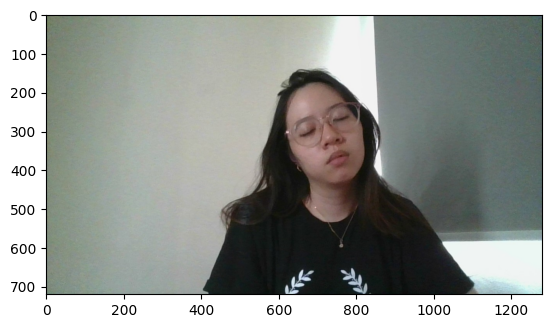

In [ ]:
# path='sleep1.jpg'
# img=imread(path)
# plt.imshow(img)
# plt.show()
# # img = img.resize((64, 64))

# # Convert the image to a numpy array
# image_array = np.array(img)

# # Flatten the image array
# image_flat = image_array.flatten()

# # Normalize the pixel values (if your model was trained with normalized data)
# # Modify this step if your model expects non-normalized data
# image_flat = image_flat / 255.0
# preprocessed_image = image_flat.reshape(1, -1)

In [ ]:
# pred = clf.predict(preprocessed_image)
# print(pred)

[0]
